In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns
from gstatot import utils
import ot

sns.set_context("paper", font_scale=1.5)
sns.set_theme(style="ticks")

data_dir = '../data/sim_data'
sim_adata = sc.read_h5ad(f"{data_dir}/bistable_sim_0.h5ad")

In [2]:
# set time points for time coureses
T_list = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
first_time = 2.0
final_time = 99.0
time_lists = {}
for T in T_list:
    theo_times = np.linspace(first_time, final_time, T, dtype=int)
    time_lists[T] = theo_times

# global parameters

key = 42 # seed for random number generator
n = 10 # number of cells per time point

# trajectory sampling parameters
sim_dt = dt =  0.01
num_step = int(2/dt) # 2 days
num_traj = sim_adata.uns['traj_data']['0.0'].shape[0] # 500 

adata_keys  = {'time_key': 'age', # key in adata.obs for age annotation
               'cell_type_key': 'cell_type', # key in adata.obs for cell type annotation
               'growth_rate_key': 'growth_rate', # key in adata.obs for cell growth rates
               'embed_key': 'X_pca'}

gStatOT_params_T = {
    2: {'lam':[35], 'w':[1.0], 'epsilon2':[0.15], 'r':[0.1]},
    5: {'lam':[35], 'w':[1.0], 'epsilon2':[0.05], 'r':[0.1]},
   10: {'lam':[35], 'w':[1.0], 'epsilon2':[0.05], 'r':[0.1]},
   15: {'lam':[30], 'w':[1.0], 'epsilon2':[0.05], 'r':[0.1]},
   20: {'lam':[25], 'w':[1.0], 'epsilon2':[0.015], 'r':[0.1]},
   25: {'lam':[20], 'w':[1.0], 'epsilon2':[0.015], 'r':[0.1]},
   30: {'lam':[20], 'w':[1.0], 'epsilon2':[0.015], 'r':[0.1]},
   35: {'lam':[20], 'w':[1.0], 'epsilon2':[0.015], 'r':[0.1]},
   40: {'lam':[20], 'w':[1.0], 'epsilon2':[0.015], 'r':[0.1]},
   45: {'lam':[20], 'w':[1.0], 'epsilon2':[0.015], 'r':[0.1]},
   50: {'lam':[20], 'w':[1.0], 'epsilon2':[0.015], 'r':[0.1]},
}

StatOT_params_T = {
       2:  {'epsilon':[0.2]},
       5:  {'epsilon':[0.2]},       
       10: {'epsilon':[0.1]},
       15: {'epsilon':[0.1]},     
       20: {'epsilon':[0.1]},
       25: {'epsilon':[0.15]},
       30: {'epsilon':[0.15]},
       35: {'epsilon':[0.15]},
       40: {'epsilon':[0.15]},
       45: {'epsilon':[0.1]},
       50: {'epsilon':[0.15]}
}

all_res_df = pd.DataFrame()
for T in time_lists.keys():
    for i in range(1, 11):

            all_res_i = pd.DataFrame()
            adata = sc.read_h5ad(f'{data_dir}/bistable_sim_{i}.h5ad')
            all_res_i = utils.run_sweep(T, time_lists, n, 1, dt, sim_dt, num_step, num_traj, adata, adata_keys, None, StatOT_params_T, gStatOT_params_T, 
                          all_res_i, max_gStatOT_iter=100_000, max_StatOT_iter=100_000, key=key, constraint_tol=1e-4, save_adatas=False, HDR_cutoff=0)
            all_res_i['experiment'] = i
            all_res_i['T'] = T
            all_res_df = pd.concat([all_res_df, all_res_i], ignore_index=True)



 Running gStatOT experiments ---------
Cost scaled by mean
Running gStatOT with params:  {'lam': 35, 'w': 1.0, 'epsilon2': 0.15, 'epsilon1': 0.005, 'epsilon3': 0.005, 'r': 0.1}
Ran 10000 iterations in 0.07 minutes.
Final objective value: 6.8092e-03
grad norm: 8.196e-06
max constraint error: 3.967e-06
ended in failed line search: False

 Running StatOT experiments ---------

 Running gStatOT experiments ---------
Cost scaled by mean
Running gStatOT with params:  {'lam': 35, 'w': 1.0, 'epsilon2': 0.15, 'epsilon1': 0.005, 'epsilon3': 0.005, 'r': 0.1}
Ran 10000 iterations in 0.07 minutes.
Final objective value: -1.0902e-01
grad norm: 1.419e-04
max constraint error: 8.077e-05
ended in failed line search: False

 Running StatOT experiments ---------
No sinks at time 99.0, cannot compute fate probabilities.

 Running gStatOT experiments ---------
Cost scaled by mean
Running gStatOT with params:  {'lam': 35, 'w': 1.0, 'epsilon2': 0.15, 'epsilon1': 0.005, 'epsilon3': 0.005, 'r': 0.1}
Ran 10000

/tmp/ipykernel_11730/488019696.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_res_df = pd.concat([all_res_df, all_res_i], ignore_index=True)



 Running gStatOT experiments ---------
Cost scaled by mean
Running gStatOT with params:  {'lam': 35, 'w': 1.0, 'epsilon2': 0.15, 'epsilon1': 0.005, 'epsilon3': 0.005, 'r': 0.1}
Ran 20000 iterations in 0.11 minutes.
Final objective value: -6.9860e-02
grad norm: 6.806e-05
max constraint error: 2.699e-05
ended in failed line search: False

 Running StatOT experiments ---------
No sinks at time 2.0, cannot compute fate probabilities.

 Running gStatOT experiments ---------
Cost scaled by mean
Running gStatOT with params:  {'lam': 35, 'w': 1.0, 'epsilon2': 0.15, 'epsilon1': 0.005, 'epsilon3': 0.005, 'r': 0.1}
Ran 10000 iterations in 0.07 minutes.
Final objective value: -1.0537e-02
grad norm: 5.050e-06
max constraint error: 2.786e-06
ended in failed line search: False

 Running StatOT experiments ---------
No sinks at time 99.0, cannot compute fate probabilities.

 Running gStatOT experiments ---------
Cost scaled by mean
Running gStatOT with params:  {'lam': 35, 'w': 1.0, 'epsilon2': 0.05,

In [3]:
# get baselines

baseline_traj_cost = {}
baseline_point_cost = {}
point_adata = sim_adata
baseline_res = {'age': [], 'traj_W2_cost': [], 'point_W2_cost': [], 'exp': []}
ages = np.unique(point_adata.obs['age'])[2:]
for exp in range(1,11):
    point_adata_1 = sc.read_h5ad(f"{data_dir}/bistable_sim_{exp}.h5ad")
    base_line_costs = []
    baseline_point_costs = []
    for age in ages:
        n_step = 200
        n_step_1 = 200
        
        sample_0 = point_adata.uns['traj_data'][str(age)][:, :n_step:1]
        sample_1 = point_adata_1.uns['traj_data'][str(age)][:, :n_step_1:1]

        cost_mat = np.asarray(utils.compute_traj_cost(sample_0, sample_1), dtype=np.float32) 
        unif0 = ot.unif(len(sample_0), type_as=cost_mat)
        unif1 = ot.unif(len(sample_1), type_as=cost_mat)
        base_line_W2_cost = np.sqrt(ot.emd2(unif0, unif1, cost_mat, numItermax=1_000_000))
        base_line_costs.append(base_line_W2_cost)


        sample_0 = point_adata.obsm['X_pca'][point_adata.obs['age'] == age]
        sample_1 = point_adata_1.obsm['X_pca'][point_adata_1.obs['age'] == age]
        cost_mat = ot.dist(sample_0, sample_1, metric='sqeuclidean')
        unif0 = ot.unif(len(sample_0), type_as=cost_mat)
        unif1 = ot.unif(len(sample_1), type_as=cost_mat)
        base_line_W2_cost = np.sqrt(ot.emd2(unif0, unif1, cost_mat, numItermax=1_000_000))
        baseline_point_costs.append(base_line_W2_cost)

        baseline_res['age'].extend([age] * len(base_line_costs))
        baseline_res['traj_W2_cost'].extend(base_line_costs)
        baseline_res['point_W2_cost'].extend(baseline_point_costs)
        baseline_res['exp'].extend([exp] * len(base_line_costs))


baseline_traj_cost = np.mean(baseline_res['traj_W2_cost'])
baseline_point_cost = np.mean(baseline_res['point_W2_cost'])

print('Mean baseline traj W2 cost:', baseline_traj_cost, 'variance:', np.var(baseline_res['traj_W2_cost']))
print('Mean baseline point W2 cost:', baseline_point_cost, 'variance:', np.var(baseline_res['point_W2_cost']))


Mean baseline traj W2 cost: 0.4088604212875086 variance: 0.0006936084713172512
Mean baseline point W2 cost: 0.27717987256507176 variance: 3.893974910697106e-05


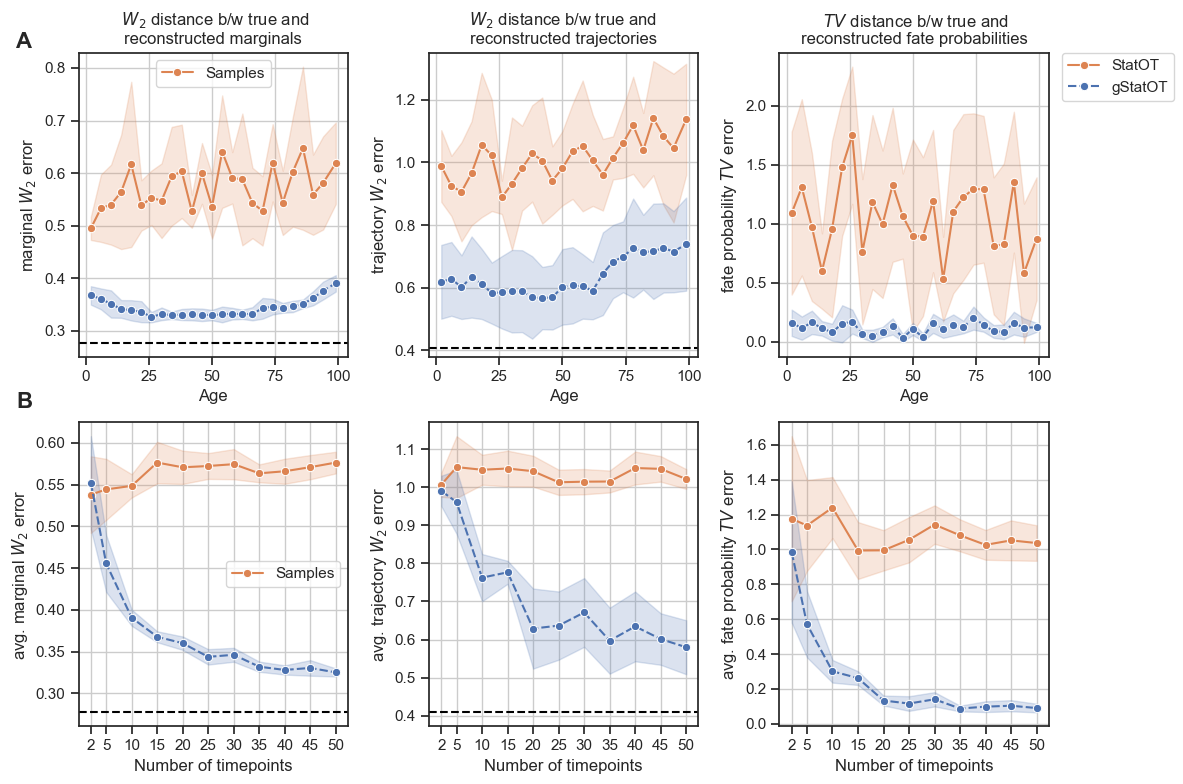

In [4]:
T_list = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

all_res_df.loc[all_res_df['FP_TV_dist'].isna(), 'FP_TV_dist'] = 2.0
all_res_df['method'] = all_res_df['method'].replace(to_replace=r'gStatOT.*', value='gStatOT', regex=True)
all_res_df['method'] = all_res_df['method'].replace(to_replace=r'StatOT_e.*', value='StatOT', regex=True)
n = 10
N_list = [n * T for T in T_list]
methods = ["Samples", "StatOT", "gStatOT"]
palette = {methods[0]: sns.color_palette("deep", n_colors=2)[1],
           methods[1]: sns.color_palette("deep", n_colors=2)[1],
           methods[2]: sns.color_palette("deep", n_colors=2)[0]}

x_ticks = [str(T) for T in T_list]
x_label = 'Number of timepoints'


fig, axes = plt.subplots(2, 3, figsize=(6.0 + 6, 4 + 4), sharex='row')

ax1 = axes[1, 0]
ax2 = axes[1, 1]
ax3 = axes[1, 2]
N_df_W2 = all_res_df.groupby(['method', 'N', 'experiment'], as_index=False)['marginal_W2_dist'].mean() 

# change statOT method to samples in N_df_W2
N_df_W2.loc[N_df_W2['method']== 'StatOT', 'method'] = 'Samples'

sns.lineplot(N_df_W2, x='N', y='marginal_W2_dist', hue='method', ax=ax1, palette=palette, marker='o', style='method', errorbar='sd')

ax1.set_ylabel(r'avg. marginal $W_2$ error')
ax1.axhline(baseline_point_cost, color='black', linestyle='--', label='Baseline')
ax1.set_xticks(np.array(N_list))
ax1.set_xticklabels(x_ticks)
ax1.set_xlabel(x_label)
labels = ['Samples']
ax1.legend(labels=labels)
ax1.grid()

N_df_W2 = all_res_df.groupby(['method', 'N', 'experiment'], as_index=False)['traj_W2_dist'].mean()

sns.lineplot(N_df_W2, x='N', y='traj_W2_dist', hue='method', ax=ax2, palette=palette, marker='o', style='method', errorbar='sd')
ax2.axhline(baseline_traj_cost, color='black', linestyle='--', label='Baseline')
ax2.set_ylabel(r'avg. trajectory $W_2$ error')
ax2.legend().set_visible(False)
ax2.set_xticks(np.array(N_list))
ax2.set_xticklabels(x_ticks)
ax2.set_xlabel(x_label)
ax2.grid()



N_df_Blin = all_res_df.groupby(['method', 'N', 'experiment'], as_index=False)['FP_TV_dist'].mean()
sns.lineplot(N_df_Blin, x='N', y='FP_TV_dist', hue='method', ax=ax3, palette=palette, marker='o', style='method', errorbar='sd')
ax3.set_ylabel(r'avg. fate probability $TV$ error')
ax3.set_xticks(np.array(N_list))
ax3.set_xticklabels(x_ticks)
ax3.set_xlabel(x_label)
ax3.legend().set_visible(False)
ax3.grid()

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[0, 2]

top_T = 25
all_res_df_2 = all_res_df[all_res_df['N'] == int(top_T*n)] 
all_res_df_2 = all_res_df_2.iloc[::-1].reset_index(drop=True)

all_res_df_2_W2_dist = all_res_df_2.copy()
all_res_df_2_W2_dist.loc[all_res_df_2_W2_dist['method']== 'StatOT', 'method'] = 'Samples'

lineplot1 = sns.lineplot(x='Age', y='marginal_W2_dist', hue='method', data=all_res_df_2_W2_dist, ax=ax1, palette=palette, marker='o', style='method', errorbar='sd')
ax1.legend(labels=labels)

ax1.set_ylabel(r'marginal $W_2$ error')
ax1.set_title(r' $W_2$ distance b/w true and' + '\n'+ 'reconstructed marginals')
lineplot2 = sns.lineplot(x='Age', y='traj_W2_dist', hue='method', data=all_res_df_2, ax=ax2, palette=palette, marker='o', style='method', errorbar='sd')

ax2.set_ylabel(r'trajectory $W_2$ error')
ax2.set_title(r'$W_2$ distance b/w true and ' +'\n'+ 'reconstructed trajectories')
ax2.legend().set_visible(False)

lineplot3 = sns.lineplot(x='Age', y='FP_TV_dist', hue='method', data=all_res_df_2, ax=ax3, palette=palette, marker='o', style='method', errorbar='sd')
ax3.set_title(r' $TV$ distance b/w true and' + '\n' + 'reconstructed fate probabilities')
ax3.set_ylabel(r'fate probability $TV$ error')
ax3.legend().set_visible(False)

ax1.axhline(baseline_point_cost, color='black', linestyle='--', label='Baseline')
ax2.axhline(baseline_traj_cost, color='black', linestyle='--', label='Baseline')
ax2.set_ylim(0.38, 1.35)

ax1.grid()
ax2.grid()
ax3.grid()
fig.text(0.02, 0.95, "A", fontsize=16, fontweight='bold', va='top', ha='left')
fig.text(0.02, 0.50, "B", fontsize=16, fontweight='bold', va='top', ha='left') 

axes[0, -1].legend(
    bbox_to_anchor=(1.05, 1),  
    loc='upper left',          
    borderaxespad=0.,
)

all_res_df.to_csv(f'{data_dir}/bistable_simulation_results.csv', index=False)
plt.tight_layout()